## Final Project - Detecting Signlanguage with Keras CNN

### Group 5 : Hsing-Yi Wang, Kuan-Fu Liu

### 1. Introduction

People who are hearing impaired are left behind in verbal communications. For people who don't know sign language, they have to use basic text chat to communicate with hearing-impaired people - a less than ideal solution. If we can translate sign language by real time, it could be applied in many ares like video health care consultaions. The dynamic nature of sign language makes it hard task for computers, but more and more startups and reasearch projects are dedicated to translating American Sign Language in real time. In our project, we start from simple sign languages for digits, applied CNN model on the image recognition, and used IBM Cloud Annotaion tool to acheive real-time detecion. The goal of this project is to achieve high accuracy and applyed the method to complext sign lanuages for words in the future. 

### 2. Requirements

In [26]:
# standart data tools
import numpy as np
import pandas as pd

# common visualizing tools
import matplotlib.pyplot as plt
import seaborn as sns

# CNN layers and the Deep Learning model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense , Flatten, Dropout
from keras.optimizers import Adam

# splitting tool for the validation set
from sklearn.model_selection import train_test_split

# to block unnecesarry warnings for updates etc.
import warnings
warnings.filterwarnings("ignore")

### 3. Python Program with Description

In [4]:
# load data

X = np.load('/Users/eve7947/ucsc-coursework/Deep_Learning_Tensor_Flow/Sign-language-digits-dataset/X.npy')
Y = np.load('/Users/eve7947/ucsc-coursework/Deep_Learning_Tensor_Flow/Sign-language-digits-dataset/Y.npy')
print('X shape : {}  Y shape: {}'.format(X.shape, y.shape))

X shape : (2062, 64, 64)  Y shape: (2062, 10)


In [5]:
# check the data of X and Y

print(" Max value of X: ",X.max())
print(" Min value of X: ",X.min())
print(" Shape of X: ",X.shape)

print("\n Max value of Y: ",Y.max())
print(" Min value of Y: ",Y.min())
print(" Shape of Y: ",Y.shape)

 Max value of X:  1.0
 Min value of X:  0.003921569
 Shape of X:  (2062, 64, 64)

 Max value of Y:  1.0
 Min value of Y:  0.0
 Shape of Y:  (2062, 10)


#### Observations: Y labels are one-hot-encoded. X features are scaled between 0 and 1.

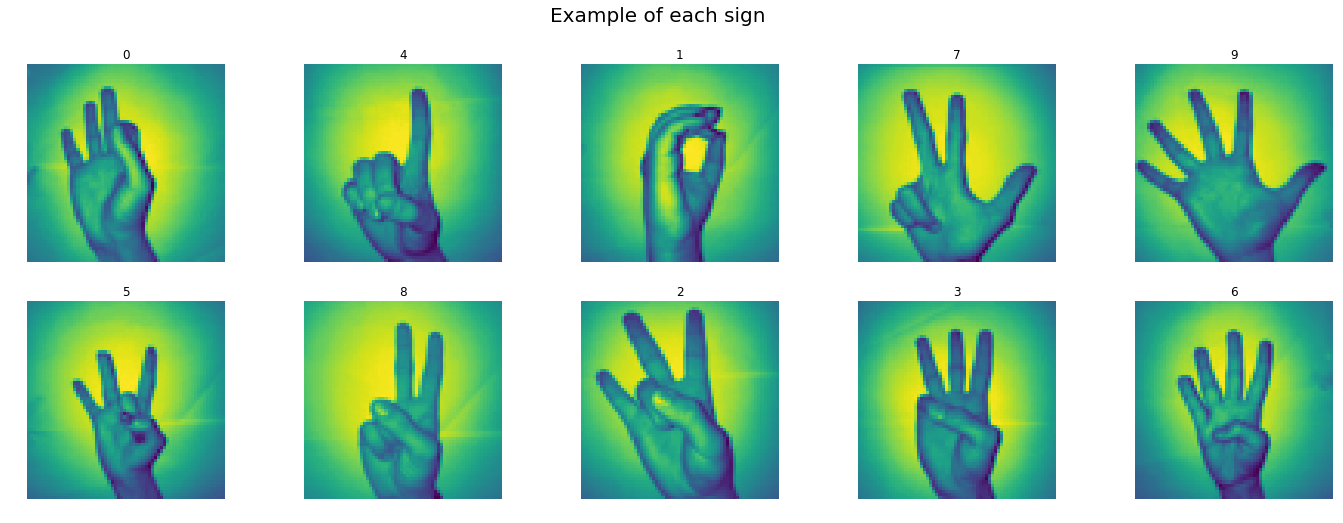

In [6]:
# plot each classes of image

plt.figure(figsize=(24,8))

plt.subplot(2,5,1)
plt.title(Y[0].argmax())
plt.imshow(X[0])
plt.axis("off")

plt.subplot(2,5,2)
plt.title(Y[1000].argmax())
plt.imshow(X[1000])
plt.axis("off")

plt.subplot(2,5,3)
plt.title(Y[222].argmax())
plt.imshow(X[222])
plt.axis("off")

plt.subplot(2,5,4)
plt.title(Y[1500].argmax())
plt.imshow(X[1500])
plt.axis("off")

plt.subplot(2,5,5)
plt.title(Y[2000].argmax())
plt.imshow(X[2000])
plt.axis("off")

plt.subplot(2,5,6)
plt.title(Y[1200].argmax())
plt.imshow(X[1200])
plt.axis("off")

plt.subplot(2,5,7)
plt.title(Y[1700].argmax())
plt.imshow(X[1700])
plt.axis("off")

plt.subplot(2,5,8)
plt.title(Y[500].argmax())
plt.imshow(X[500])
plt.axis("off")

plt.subplot(2,5,9)
plt.title(Y[700].argmax())
plt.imshow(X[700])
plt.axis("off")

plt.subplot(2,5,10)
plt.title(Y[1400].argmax())
plt.imshow(X[1400])
plt.axis("off")

plt.suptitle("Example of each sign", fontsize=20)
plt.show()

#### Observation: The Y label does not correctly map in the order of real sign language, but the owner of the dataset point out he did this on purpose. The Y label is still one-hot encoded, but he wants to create dynamic architecture so he labeled them in his order. This doesn't impact our training as long as it is one-hot encoded. 

In [7]:
# split training and testing dataset

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)


### 3.1 First CNN Model Training

In [8]:
# create our first CNN model

CNN_model = Sequential()

CNN_model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",padding="same",input_shape=(64,64,1)))
CNN_model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"))
CNN_model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Conv2D(filters=32,kernel_size=(2,2),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Flatten())

CNN_model.add(Dense(128,activation="relu"))
CNN_model.add(Dense(64,activation="relu"))
CNN_model.add(Dense(40,activation="relu"))

CNN_model.add(Dense(10,activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
# summary of the model

CNN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        16416     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
__________

In [9]:
# compliation

CNN_model.compile(optimizer=Adam(lr=0.0002),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

In [10]:
# training

results = CNN_model.fit(x_train,y_train,epochs=70,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 1649 samples, validate on 413 samples
Epoch 1/70
1649/1649 [==============================] - 29s 18ms/step - loss: 2.3031 - acc: 0.1037 - val_loss: 2.3031 - val_acc: 0.0775
Epoch 2/70
1649/1649 [==============================] - 26s 16ms/step - loss: 2.3027 - acc: 0.1055 - val_loss: 2.3037 - val_acc: 0.0775
Epoch 3/70
1649/1649 [==============================] - 26s 16ms/step - loss: 2.3023 - acc: 0.0995 - val_loss: 2.3040 - val_acc: 0.0775
Epoch 4/70
1649/1649 [==============================] - 27s 16ms/step - loss: 2.2962 - acc: 0.1219 - val_loss: 2.2600 - val_acc: 0.2131
Epoch 5/70
1649/1649 [==============================] - 27s 16ms/step - loss: 1.9834 - acc: 0.2608 - val_loss: 1.6200 - val_acc: 0.3971
Epoch 6/70
1649/1649 [==============================] - 27s 16ms/step - loss: 1.5739 - acc: 0.4160 - val_loss: 1.2421 - val_acc: 0.5738
Epoch 7/70
1649/1649 [==============================] - 28s 17ms/step - loss: 1.3000 - ac

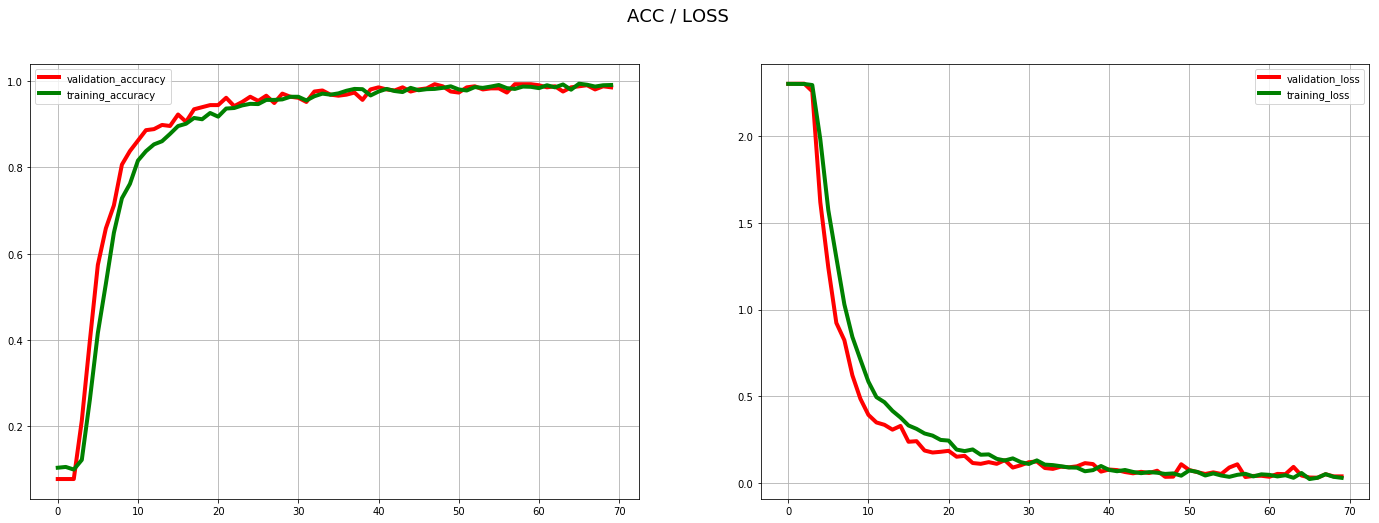

In [11]:
# plot the result

plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(results.history["val_acc"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(results.history["acc"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(results.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(results.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

### 3.2 Second CNN Model Training (Include image data variation for comparison)

### -Generate batches of tensor image data with real-time data augmentation: ImageDataGenerator in Keras
### -Purpose:  if total number of images are less, we need to perform image augmentations to increase our dataset size (https://medium.com/@arindambaidya168/https-medium-com-arindambaidya168-using-keras-imagedatagenerator-b94a87cdefad)

In [13]:
# create a data generator using Keras image preprocessing
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=16,
    width_shift_range=0.12,
    height_shift_range=0.12,
    zoom_range=0.12
    )

In [14]:
# split test and train
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=8)
# add another axis representing grey-scale
Xtest = Xtest[:,:,:,np.newaxis]
Xtrain = Xtrain[:,:,:,np.newaxis]

Test Images:


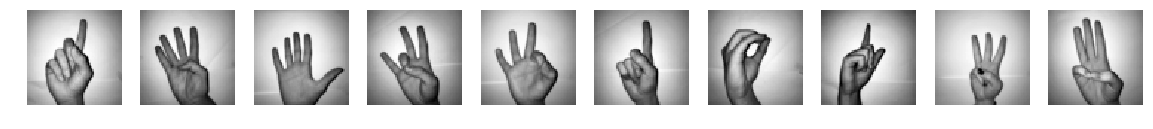

In [15]:
# sanity check - test images
print('Test Images:')
n = 10
plt.figure(figsize=(20,20))
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(Xtrain[i].reshape(64, 64))
    plt.gray()
    plt.axis('off')

In [16]:
datagen.fit(Xtrain)

In [18]:
# build our second CNN model
from keras.layers import Dense, Activation, Dropout, Flatten, Input, Conv2D, MaxPooling2D, BatchNormalization
model = Sequential()

# Convolutional Blocks: (1) Convolution, (2) Activation, (3) Pooling
model.add(Conv2D(input_shape=(64, 64, 1), filters=64, kernel_size=(4,4), strides=(2)))
model.add(Activation('relu'))
#outputs a (20, 20, 32) matrix
model.add(Conv2D(filters=64, kernel_size=(4,4), strides=(1)))
model.add(Activation('relu'))
#outputs a (8, 8, 32) matrix
model.add(MaxPooling2D(pool_size=4))

# dropout helps with over fitting by randomly dropping nodes each epoch
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

### - Train on only the actual dataset

In [20]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adadelta(),
             metrics=['accuracy'])
model.fit(Xtrain, ytrain, batch_size=32, epochs=10)

score = model.evaluate(Xtest, ytest, verbose=0)

Epoch 1/10
1649/1649 [==============================] - 11s 7ms/step - loss: 1.4321 - acc: 0.5209
Epoch 2/10
1649/1649 [==============================] - 12s 7ms/step - loss: 0.5575 - acc: 0.8132
Epoch 3/10
1649/1649 [==============================] - 11s 7ms/step - loss: 0.3891 - acc: 0.8696
Epoch 4/10
1649/1649 [==============================] - 10s 6ms/step - loss: 0.2845 - acc: 0.9072: 5s 
Epoch 5/10
1649/1649 [==============================] - 10s 6ms/step - loss: 0.2175 - acc: 0.9297
Epoch 6/10
1649/1649 [==============================] - 11s 7ms/step - loss: 0.1952 - acc: 0.9400
Epoch 7/10
1649/1649 [==============================] - 11s 6ms/step - loss: 0.1249 - acc: 0.9648
Epoch 8/10
1649/1649 [==============================] - 11s 6ms/step - loss: 0.1093 - acc: 0.9697
Epoch 9/10
1649/1649 [==============================] - 10s 6ms/step - loss: 0.0841 - acc: 0.9776
Epoch 10/10
1649/1649 [==============================] - 11s 6ms/step - loss: 0.0695 - acc: 0.9830


In [21]:
print('Loss: {:.4f}  Accuaracy: {:.4}%'.format(score[0],score[1]))

Loss: 0.2090  Accuaracy: 0.9346%


#### Observation: We slightly overfit our training data, that is, we got a higher accuracy on our training than test data. 

### - Train on Transformed Images

In [22]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adadelta(),
             metrics=['accuracy'])
model.fit_generator(datagen.flow(Xtrain, ytrain, batch_size=32),
                    steps_per_epoch=64, epochs=10)

score = model.evaluate(Xtest, ytest, verbose=0)

Epoch 1/10
64/64 [==============================] - 16s 248ms/step - loss: 0.9597 - acc: 0.6985
Epoch 2/10
64/64 [==============================] - 15s 231ms/step - loss: 0.6504 - acc: 0.7912
Epoch 3/10
64/64 [==============================] - 16s 243ms/step - loss: 0.5033 - acc: 0.8393
Epoch 4/10
64/64 [==============================] - 15s 239ms/step - loss: 0.4260 - acc: 0.8584
Epoch 5/10
64/64 [==============================] - 16s 254ms/step - loss: 0.4218 - acc: 0.8617
Epoch 6/10
64/64 [==============================] - 16s 246ms/step - loss: 0.3395 - acc: 0.8922
Epoch 7/10
64/64 [==============================] - 15s 238ms/step - loss: 0.3064 - acc: 0.9092
Epoch 8/10
64/64 [==============================] - 15s 233ms/step - loss: 0.2980 - acc: 0.9097
Epoch 9/10
64/64 [==============================] - 16s 250ms/step - loss: 0.3231 - acc: 0.8963
Epoch 10/10
64/64 [==============================] - 17s 264ms/step - loss: 0.2521 - acc: 0.9186


In [23]:
print('Loss: {:.4f}  Accuaracy: {:.4}%'.format(score[0],score[1]))

Loss: 0.0546  Accuaracy: 0.9855%


#### Observation: Further training on our arugmented data increased the accuracy by a fair amount

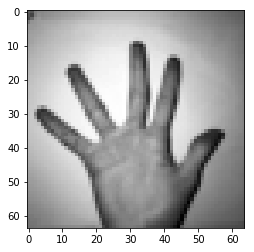

In [24]:
# draw and check prediction

test_image = Xtest[10]
test_image_array = test_image.reshape(64, 64)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

plt.imshow(test_image_array, cmap='gray')

In [25]:
print(np.round(result, 1))
print(ytest[10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
